<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from tqdm import tqdm

In [175]:
mat = scipy.io.loadmat('data.mat')
trainInputs = np.array(mat['data']['test'][0][0][0][0][0])
trainTargets = np.array(mat['data']['test'][0][0][0][0][1])

testInputs = np.array(mat['data']['training'][0][0][0][0][0])
testTargets = np.array(mat['data']['training'][0][0][0][0][1])

validationInputs = np.array(mat['data']['validation'][0][0][0][0][1])
validationTargets = np.array(mat['data']['validation'][0][0][0][0][0])

In [180]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

def crossEntropyLoss(y_true, y_pred, k):
  #loss = -y_true * np.log(y_pred + 1e-15)
  #return np.sum(loss) / len(y_true)
  loss = -y_true[y_true == 1] @ np.log(y_pred[y_true == 1])
  return (loss + NN.l1 * np.abs(k).mean()) / len(y_true)

def targetsSearch(data):
  predict = NN.feedforward(data)
  return [np.argmax(item) for item in predict.T]

In [197]:
class NeuralNetwork:

  def __init__(self, k):

    self.k = k

    self.loss = list()

    self.l1 = 0.1
  
  def feedforward(self, data):
    y = softmax(self.k @ data)
    return y
  
  def train(self, data, y_true):
    alpha = 0.0001
    epochs = 1000

    for epoch in tqdm(range(epochs)):

      """backprop"""

      predict = self.feedforward(data)

      dL_dk = (predict - y_true) @ data.T

      self.k -= alpha * (dL_dk + self.l1 * np.sign(self.k))

      self.loss.append(crossEntropyLoss(y_true.T, predict.T, self.k))

In [ ]:
kParameters = np.zeros((10, 256))
NN = NeuralNetwork(kParameters)
NN.train(trainInputs, trainTargets)

In [199]:
confMatrixTest = [[0 for i in range(10)] for j in range(10)]
confMatrixTrain = [[0 for i in range(10)] for j in range(10)]
confMatrixValidation = [[0 for i in range(10)] for j in range(10)]

testPredictions = targetsSearch(testInputs)
validationPredictions = targetsSearch(validationInputs)
trainPredictions = targetsSearch(trainInputs)


for index in range(len(trainPredictions)):
  if index < 1000:
    confMatrixTest[np.argmax(testTargets.T[index])][testPredictions[index]] += 1
    confMatrixValidation[np.argmax(validationTargets.T[index])][validationPredictions[index]] += 1
  confMatrixTrain[np.argmax(trainTargets.T[index])][trainPredictions[index]] += 1

In [200]:
print(np.mean([confMatrixTest[i][i] for i in range(10)]))
confMatrixTest

92.4


[[94, 1, 0, 0, 1, 0, 0, 1, 3, 0],
 [1, 97, 0, 0, 0, 0, 0, 0, 2, 0],
 [0, 0, 92, 0, 0, 1, 3, 1, 3, 0],
 [2, 0, 0, 93, 0, 3, 0, 0, 1, 1],
 [1, 2, 0, 0, 88, 0, 3, 1, 0, 5],
 [2, 1, 1, 5, 2, 89, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 96, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 95, 0, 5],
 [0, 2, 1, 3, 1, 1, 0, 3, 89, 0],
 [0, 1, 0, 0, 3, 0, 0, 4, 1, 91]]

In [201]:
print(np.mean([confMatrixValidation[i][i] for i in range(10)]))
confMatrixValidation

92.5


[[96, 0, 0, 0, 2, 0, 2, 0, 0, 0],
 [1, 93, 0, 1, 2, 0, 0, 0, 3, 0],
 [1, 0, 89, 2, 1, 1, 1, 0, 5, 0],
 [0, 0, 3, 89, 0, 5, 0, 1, 1, 1],
 [1, 1, 0, 0, 91, 0, 5, 0, 0, 2],
 [1, 1, 0, 1, 0, 90, 1, 1, 4, 1],
 [2, 3, 1, 0, 1, 0, 93, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 94, 0, 4],
 [0, 1, 1, 1, 1, 0, 0, 0, 96, 0],
 [0, 0, 0, 1, 3, 0, 0, 2, 0, 94]]

In [202]:
print(np.mean([confMatrixTrain[i][i] for i in range(10)]))
confMatrixTrain

845.0


[[871, 2, 5, 1, 7, 4, 6, 0, 4, 0],
 [2, 852, 2, 8, 9, 0, 6, 3, 17, 1],
 [10, 5, 827, 2, 6, 6, 16, 11, 16, 1],
 [5, 2, 14, 823, 0, 26, 4, 8, 11, 7],
 [2, 17, 2, 0, 848, 0, 12, 1, 1, 17],
 [9, 1, 2, 20, 4, 841, 3, 4, 11, 5],
 [4, 14, 3, 1, 10, 3, 865, 0, 0, 0],
 [1, 3, 0, 0, 5, 1, 0, 866, 3, 21],
 [7, 19, 9, 9, 6, 26, 4, 1, 803, 16],
 [1, 7, 0, 0, 12, 2, 0, 19, 5, 854]]

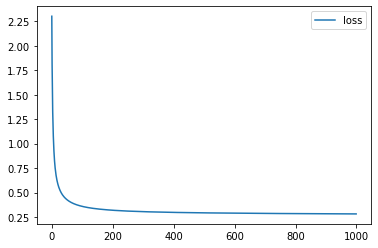

In [203]:
plt.plot(NN.loss, label='loss')
plt.legend()